In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv("dltutsCHURN_csvsheet.csv")
df.sample(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
4878,7869-ZYDST,Male,0,Yes,No,31,Yes,Yes,DSL,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),59.05,1882.8,No
2970,2815-CPTUL,Male,1,No,No,5,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,70.25,331.9,Yes
1134,2208-NQBCT,Female,0,Yes,Yes,26,Yes,No,Fiber optic,Yes,...,No,No,No,No,Month-to-month,No,Electronic check,81.95,2070.05,No
92,7233-PAHHL,Male,0,Yes,Yes,66,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Mailed check,84.00,5714.25,No
2631,6861-XWTWQ,Male,1,Yes,No,7,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.25,665.45,Yes


In [3]:
df.drop('customerID',axis='columns',inplace=True)
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [4]:
df.TotalCharges.values

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [5]:
df.MonthlyCharges.values

array([ 29.85,  56.95,  53.85, ...,  29.6 ,  74.4 , 105.65])

In [6]:
pd.to_numeric(df.TotalCharges,errors='coerce')

0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: TotalCharges, Length: 7043, dtype: float64

In [7]:
pd.to_numeric(df.TotalCharges,errors='coerce').isnull()
#coerce will ignore the errors wherever it has spaces it will put na

0       False
1       False
2       False
3       False
4       False
        ...  
7038    False
7039    False
7040    False
7041    False
7042    False
Name: TotalCharges, Length: 7043, dtype: bool

In [8]:
#passing the above result to our dataframe will show that the totalcharges column is empty so we can drop it
df[pd.to_numeric(df.TotalCharges,errors='coerce').isnull()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [9]:
df.shape#original

(7043, 20)

In [10]:
df[pd.to_numeric(df.TotalCharges,errors='coerce').isnull()].shape
#this is after we drop all correct or True totalcharges row

(11, 20)

In [11]:
df.iloc[488]

gender                                 Female
SeniorCitizen                               0
Partner                                   Yes
Dependents                                Yes
tenure                                      0
PhoneService                               No
MultipleLines                No phone service
InternetService                           DSL
OnlineSecurity                            Yes
OnlineBackup                               No
DeviceProtection                          Yes
TechSupport                               Yes
StreamingTV                               Yes
StreamingMovies                            No
Contract                             Two year
PaperlessBilling                          Yes
PaymentMethod       Bank transfer (automatic)
MonthlyCharges                          52.55
TotalCharges                                 
Churn                                      No
Name: 488, dtype: object

In [12]:
df.iloc[488]['TotalCharges']

' '

In [13]:
df1 = df[df.TotalCharges!=' ']
df1.shape

(7032, 20)

In [14]:
df1.TotalCharges = pd.to_numeric(df1.TotalCharges)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py:5494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [15]:
df1.TotalCharges.dtypes

dtype('float64')

In [16]:
#finding loyal customer with large tenure using histogram

In [17]:
df1[df1.Churn=='No']

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
6,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,No
7,Female,0,No,No,10,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7037,Female,0,No,No,72,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),21.15,1419.40,No
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No


In [18]:
df1[df1.Churn=='No'].tenure

0        1
1       34
3       45
6       22
7       10
        ..
7037    72
7038    24
7039    72
7040    11
7042    66
Name: tenure, Length: 5163, dtype: int64

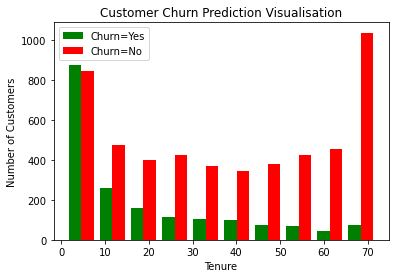

In [19]:
tenure_churn_no = df1[df1.Churn=='No'].tenure
tenure_churn_yes = df1[df1.Churn=='Yes'].tenure

plt.xlabel("Tenure")
plt.ylabel("Number of Customers")
plt.title("Customer Churn Prediction Visualisation")

plt.hist([tenure_churn_yes,tenure_churn_no], color=['green','red'],label=['Churn=Yes','Churn=No'])
plt.legend()

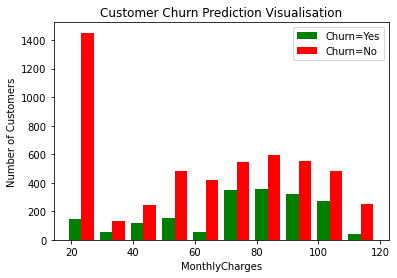

In [20]:
mc_churn_no = df1[df1.Churn=='No'].MonthlyCharges
mc_churn_yes = df1[df1.Churn=='Yes'].MonthlyCharges

plt.xlabel("MonthlyCharges")
plt.ylabel("Number of Customers")
plt.title("Customer Churn Prediction Visualisation")

plt.hist([mc_churn_yes,mc_churn_no], color=['green','red'],label=['Churn=Yes','Churn=No'])
plt.legend()

In [21]:
def print_unique_col_values(df):
    for column in df:
        if df[column].dtypes=='object':
            print(f'{column} : {df[column].unique()}')

In [22]:
print_unique_col_values(df1)

gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


In [23]:
#replacing no internet service , no phone sevice with no

In [24]:
df1.replace('No internet service','No',inplace=True)
df1.replace('No phone service','No',inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4524: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


In [25]:
print_unique_col_values(df1)

gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes']
OnlineBackup : ['Yes' 'No']
DeviceProtection : ['No' 'Yes']
TechSupport : ['No' 'Yes']
StreamingTV : ['No' 'Yes']
StreamingMovies : ['No' 'Yes']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


In [26]:
#replacing yes, no with 1 and 0

In [27]:
yes_no_columns = ['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport',
                  'StreamingTV','StreamingMovies','PaperlessBilling','Churn']

for col in yes_no_columns:
    df1[col].replace({'Yes':1,'No':0},inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\series.py:4509: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


In [28]:
for col in df1:
    print(f'{col}:{df1[col].unique()}')

gender:['Female' 'Male']
SeniorCitizen:[0 1]
Partner:[1 0]
Dependents:[0 1]
tenure:[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService:[0 1]
MultipleLines:[0 1]
InternetService:['DSL' 'Fiber optic' 'No']
OnlineSecurity:[0 1]
OnlineBackup:[1 0]
DeviceProtection:[0 1]
TechSupport:[0 1]
StreamingTV:[0 1]
StreamingMovies:[0 1]
Contract:['Month-to-month' 'One year' 'Two year']
PaperlessBilling:[1 0]
PaymentMethod:['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges:[29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges:[  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn:[0 1]


In [29]:
df1['gender'].replace({'Female':1,'Male':0},inplace=True)

In [30]:
df1['gender'].unique()

array([1, 0], dtype=int64)

In [31]:
df2 = pd.get_dummies(data=df1,columns=['InternetService','PaymentMethod','Contract'])
df2.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
       'Contract_Month-to-month', 'Contract_One year', 'Contract_Two year'],
      dtype='object')

In [32]:
df2.sample(4)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Contract_Month-to-month,Contract_One year,Contract_Two year
1327,0,0,1,0,59,1,1,0,0,1,...,0,1,0,1,0,0,0,0,1,0
5824,0,0,1,1,66,1,1,0,1,1,...,1,0,0,1,0,0,0,0,0,1
1379,1,0,0,0,70,0,0,1,1,1,...,1,0,0,1,0,0,0,0,0,1
6451,0,1,1,1,66,1,1,1,1,1,...,0,1,0,0,0,1,0,0,1,0


In [33]:
df1.shape

(7032, 20)

In [34]:
df2.shape

(7032, 27)

In [35]:
df2.dtypes

gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
InternetService_DSL                          uint8
InternetService_Fiber optic                  uint8
InternetService_No             

In [36]:
#scaling the data

In [37]:
cols_to_scale = ['MonthlyCharges','TotalCharges','tenure']

from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

df2[cols_to_scale]=scaler.fit_transform(df2[cols_to_scale])

In [38]:
for cols in df2:
    print(f'{col}:{df2[cols_to_scale]}')

Churn:      MonthlyCharges  TotalCharges    tenure
0           0.115423      0.001275  0.000000
1           0.385075      0.215867  0.464789
2           0.354229      0.010310  0.014085
3           0.239303      0.210241  0.619718
4           0.521891      0.015330  0.014085
...              ...           ...       ...
7038        0.662189      0.227521  0.323944
7039        0.845274      0.847461  1.000000
7040        0.112935      0.037809  0.140845
7041        0.558706      0.033210  0.042254
7042        0.869652      0.787641  0.915493

[7032 rows x 3 columns]
Churn:      MonthlyCharges  TotalCharges    tenure
0           0.115423      0.001275  0.000000
1           0.385075      0.215867  0.464789
2           0.354229      0.010310  0.014085
3           0.239303      0.210241  0.619718
4           0.521891      0.015330  0.014085
...              ...           ...       ...
7038        0.662189      0.227521  0.323944
7039        0.845274      0.847461  1.000000
7040        0.1129

In [39]:
X=df2.drop('Churn',axis='columns')
y=df2['Churn']

In [40]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=5)

In [41]:
y_test.value_counts()

0    999
1    408
Name: Churn, dtype: int64

In [42]:
X_train.shape

(5625, 26)

In [43]:
X_test.shape

(1407, 26)

In [44]:
X_train[:10]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Contract_Month-to-month,Contract_One year,Contract_Two year
5664,1,1,0,0,0.126761,1,0,0,0,1,...,0,1,0,0,1,0,0,1,0,0
101,1,0,1,1,0.000000,1,0,0,0,0,...,0,0,1,0,0,1,0,1,0,0
2621,0,0,1,0,0.985915,1,0,0,1,1,...,1,0,0,0,1,0,0,0,0,1
392,1,1,0,0,0.014085,1,0,0,0,0,...,1,0,0,0,0,1,0,1,0,0
1327,0,0,1,0,0.816901,1,1,0,0,1,...,0,1,0,1,0,0,0,0,1,0
3607,1,0,0,0,0.169014,1,0,1,0,0,...,1,0,0,0,0,0,1,0,1,0
2773,0,0,1,0,0.323944,0,0,0,0,1,...,1,0,0,0,0,1,0,1,0,0
1936,1,0,1,0,0.704225,1,0,1,1,0,...,1,0,0,1,0,0,0,0,1,0
5387,0,0,0,0,0.042254,0,0,0,0,0,...,1,0,0,0,0,1,0,1,0,0
4331,0,0,0,0,0.985915,1,1,0,0,0,...,0,0,1,1,0,0,0,0,0,1


In [45]:
len(X_train.columns)

26

In [46]:
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import confusion_matrix,classification_report


In [47]:
def ANN(X_train,y_train,X_test,y_test,loss,weights):
    model=keras.Sequential([
        keras.layers.Dense(20,input_shape=(26,),activation='relu'),
        keras.layers.Dense(1,activation='sigmoid'),
    ])

    model.compile(optimizer='adam',
             loss='binary_crossentropy',
             metrics=['accuracy'])
    
    if weights==-1:
        model.fit(X_train,y_train,epochs=100)
    else:
        model.fit(X_train,y_train,epochs=100,class_weights=weights)
        
    print(model.evaluate(X_test,y_test))
    
    y_preds=model.predict(X_test)
    y_preds=np.round(y_preds)
    
    print("Classification Report: \n", classification_report(y_test,y_preds))
    
    return y_preds
            

In [48]:
y_preds = ANN(X_train,y_train,X_test,y_test,'binary_crossentropy',-1)

Epoch 1/100
176/176 [==============================] - 1s 1ms/step - loss: 0.5082 - accuracy: 0.7564
Epoch 2/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4369 - accuracy: 0.7936
Epoch 3/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4236 - accuracy: 0.7973
Epoch 4/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4173 - accuracy: 0.8028
Epoch 5/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4137 - accuracy: 0.8059
Epoch 6/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4122 - accuracy: 0.8036
Epoch 7/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4099 - accuracy: 0.8085
Epoch 8/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4087 - accuracy: 0.8087
Epoch 9/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4076 - accuracy: 0.8085
Epoch 10/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4068 - accura

In [49]:
#class count
count_class_0,count_class_1 = df1.Churn.value_counts()

#divide by class
df_class_0 = df2[df2['Churn']==0] 
df_class_1 = df2[df2['Churn']==1] 

In [50]:
count_class_0,count_class_1

(5163, 1869)

In [51]:
df_class_0.shape

(5163, 27)

In [52]:
df_class_1.shape

(1869, 27)

In [53]:
df_class_0.sample(2)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Contract_Month-to-month,Contract_One year,Contract_Two year
5668,1,1,1,0,0.535211,1,1,0,0,0,...,0,1,0,0,0,1,0,1,0,0
4841,1,0,0,0,0.323944,1,0,1,0,0,...,0,1,0,0,0,1,0,1,0,0


In [54]:
df_class_0.sample(count_class_0).shape

(5163, 27)

In [55]:
df_class_0.sample(count_class_1).shape

(1869, 27)

In [56]:
df_class_0_under=df_class_0.sample(count_class_1)

df_test_under=pd.concat([df_class_0_under,df_class_1],axis=0)
print('Random under-sampling:')
print(df_test_under.Churn.value_counts())

Random under-sampling:
0    1869
1    1869
Name: Churn, dtype: int64


In [57]:
X=df_test_under.drop('Churn',axis='columns')
y=df_test_under['Churn']

from sklearn.model_selection import train_test_split 
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=15,stratify = y)
#stratify makes sure we have balanced samples

In [58]:
y_train.value_counts()

0    1495
1    1495
Name: Churn, dtype: int64

In [59]:
y_preds = ANN(X_train,y_train,X_test,y_test, 'binary_crossentropy', -1)

Epoch 1/100
94/94 [==============================] - 0s 1ms/step - loss: 0.6620 - accuracy: 0.6003
Epoch 2/100
94/94 [==============================] - 0s 1ms/step - loss: 0.5500 - accuracy: 0.7331
Epoch 3/100
94/94 [==============================] - 0s 1ms/step - loss: 0.5155 - accuracy: 0.7482
Epoch 4/100
94/94 [==============================] - 0s 1ms/step - loss: 0.5020 - accuracy: 0.7572
Epoch 5/100
94/94 [==============================] - 0s 1ms/step - loss: 0.4947 - accuracy: 0.7599
Epoch 6/100
94/94 [==============================] - 0s 975us/step - loss: 0.4913 - accuracy: 0.7619
Epoch 7/100
94/94 [==============================] - 0s 1ms/step - loss: 0.4881 - accuracy: 0.7622
Epoch 8/100
94/94 [==============================] - 0s 975us/step - loss: 0.4861 - accuracy: 0.7632
Epoch 9/100
94/94 [==============================] - 0s 865us/step - loss: 0.4852 - accuracy: 0.7639
Epoch 10/100
94/94 [==============================] - 0s 1ms/step - loss: 0.4847 - accuracy: 0.7635
Epo

In [60]:
#METHOD-2: OVERSAMPLING

In [61]:
count_class_0,count_class_1

(5163, 1869)

In [62]:
df_class_1.shape

(1869, 27)

In [63]:
#df_class_1_over.sample(count_class_0,replace=True).shape

In [64]:
df_class_1_over = df_class_1.sample(count_class_0, replace=True)
df_test_over = pd.concat([df_class_0,df_class_1_over],axis=0)
df_test_over.shape
print('Random over-sampling:')
print(df_test_over.Churn.value_counts())

Random over-sampling:
0    5163
1    5163
Name: Churn, dtype: int64


In [65]:
X=df_test_over.drop('Churn',axis='columns')
y=df_test_over['Churn']

from sklearn.model_selection import train_test_split 
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=15,stratify = y)
#stratify makes sure we have balanced samples

In [66]:
y_train.value_counts()

0    4130
1    4130
Name: Churn, dtype: int64

In [67]:
y_test.value_counts()

0    1033
1    1033
Name: Churn, dtype: int64

In [68]:
y_preds = ANN(X_train,y_train,X_test,y_test, 'binary_crossentropy', -1)

Epoch 1/100
259/259 [==============================] - 1s 1ms/step - loss: 0.5710 - accuracy: 0.7051
Epoch 2/100
259/259 [==============================] - 0s 1ms/step - loss: 0.4969 - accuracy: 0.7544
Epoch 3/100
259/259 [==============================] - 0s 1ms/step - loss: 0.4895 - accuracy: 0.7616
Epoch 4/100
259/259 [==============================] - 0s 963us/step - loss: 0.4852 - accuracy: 0.7626
Epoch 5/100
259/259 [==============================] - 0s 1ms/step - loss: 0.4829 - accuracy: 0.7642
Epoch 6/100
259/259 [==============================] - 0s 1ms/step - loss: 0.4802 - accuracy: 0.7671
Epoch 7/100
259/259 [==============================] - 0s 1ms/step - loss: 0.4781 - accuracy: 0.7679
Epoch 8/100
259/259 [==============================] - 0s 1ms/step - loss: 0.4766 - accuracy: 0.7671
Epoch 9/100
259/259 [==============================] - 0s 1ms/step - loss: 0.4745 - accuracy: 0.7695
Epoch 10/100
259/259 [==============================] - 0s 1ms/step - loss: 0.4729 - accu

259/259 [==============================] - 0s 1ms/step - loss: 0.4352 - accuracy: 0.7920
Epoch 82/100
259/259 [==============================] - 0s 1ms/step - loss: 0.4354 - accuracy: 0.7939
Epoch 83/100
259/259 [==============================] - 0s 965us/step - loss: 0.4349 - accuracy: 0.7908
Epoch 84/100
259/259 [==============================] - 0s 1ms/step - loss: 0.4350 - accuracy: 0.7907
Epoch 85/100
259/259 [==============================] - 0s 1ms/step - loss: 0.4348 - accuracy: 0.7921
Epoch 86/100
259/259 [==============================] - 0s 1ms/step - loss: 0.4341 - accuracy: 0.7904
Epoch 87/100
259/259 [==============================] - 0s 995us/step - loss: 0.4340 - accuracy: 0.7919
Epoch 88/100
259/259 [==============================] - 0s 1ms/step - loss: 0.4347 - accuracy: 0.7938
Epoch 89/100
259/259 [==============================] - 0s 984us/step - loss: 0.4336 - accuracy: 0.7921
Epoch 90/100
259/259 [==============================] - 0s 1ms/step - loss: 0.4333 - accu

In [69]:
#METHOD - SMOTE oversampling producing synthesis samples
#uses k nearest neighbour algo

In [70]:
X = df2.drop('Churn' , axis='columns')
y = df2['Churn']

In [71]:
y.value_counts()

0    5163
1    1869
Name: Churn, dtype: int64

In [72]:
#pip install -U imbalanced-learn

  Attempting uninstall: imbalanced-learn
    Found existing installation: imbalanced-learn 0.8.0
    Uninstalling imbalanced-learn-0.8.0:
Note: you may need to restart the kernel to use updated packages.


ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'c:\\programdata\\anaconda3\\lib\\site-packages\\imbalanced_learn-0.8.0.dist-info\\AUTHORS.rst'
Consider using the `--user` option or check the permissions.



In [73]:
import platform; print(platform.platform())
import sys; print("Python", sys.version)
import numpy; print("NumPy", numpy.__version__)
import scipy; print("SciPy", scipy.__version__)
import sklearn; print("Scikit-Learn", sklearn.__version__)
import imblearn; print("Imblearn", imblearn.__version__)


Windows-10-10.0.19041-SP0
Python 3.8.8 (default, Apr 13 2021, 15:08:03) [MSC v.1916 64 bit (AMD64)]
NumPy 1.21.0
SciPy 1.6.2
Scikit-Learn 0.24.2
Imblearn 0.8.0


In [74]:
import imblearn
print(imblearn.__version__)

0.8.0


In [75]:
#pip install imbalanced-learn
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy = 'minority')
X_sm , y_sm = smote.fit_resample(X,y)

y_sm.value_counts()

0    5163
1    5163
Name: Churn, dtype: int64

In [76]:
from sklearn.model_selection import train_test_split 
X_train,X_test,y_train,y_test = train_test_split(X_sm,y_sm,test_size=0.2,random_state=15,stratify = y_sm)

In [77]:
y_train.value_counts()

0    4130
1    4130
Name: Churn, dtype: int64

In [78]:
y_test.value_counts()

0    1033
1    1033
Name: Churn, dtype: int64

In [79]:
y_preds = ANN(X_train,y_train,X_test,y_test, 'binary_crossentropy', -1)

Epoch 1/100
259/259 [==============================] - 1s 1ms/step - loss: 0.5642 - accuracy: 0.7163
Epoch 2/100
259/259 [==============================] - 0s 1ms/step - loss: 0.4800 - accuracy: 0.7694: 0s - loss: 0.4806 - accuracy
Epoch 3/100
259/259 [==============================] - 0s 1ms/step - loss: 0.4689 - accuracy: 0.7737
Epoch 4/100
259/259 [==============================] - 0s 1ms/step - loss: 0.4638 - accuracy: 0.7780
Epoch 5/100
259/259 [==============================] - 0s 803us/step - loss: 0.4599 - accuracy: 0.7798
Epoch 6/100
259/259 [==============================] - 0s 1ms/step - loss: 0.4570 - accuracy: 0.7832
Epoch 7/100
259/259 [==============================] - 0s 1ms/step - loss: 0.4540 - accuracy: 0.7835
Epoch 8/100
259/259 [==============================] - 0s 1ms/step - loss: 0.4514 - accuracy: 0.7868
Epoch 9/100
259/259 [==============================] - 0s 1ms/step - loss: 0.4493 - accuracy: 0.7880
Epoch 10/100
259/259 [==============================] - 0s 

In [80]:
#METHOD USE OF ENSEMBLE WITH UNDERSAMPLING

In [81]:
df2.Churn.value_counts()

0    5163
1    1869
Name: Churn, dtype: int64

In [82]:
X=df2.drop('Churn',axis='columns')
y=df2['Churn']

In [83]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=15,stratify=y)

In [84]:
y_train.value_counts()

0    4130
1    1495
Name: Churn, dtype: int64

In [85]:
4130/1495 #checking ratio i.e. approx 3

2.762541806020067

In [86]:
4130/3 #dividing by the approx ratio

1376.6666666666667

In [87]:
df3 = X_train.copy()
df3['Churn'] = y_train

In [88]:
df3_class0 = df3[df3.Churn==0]
df3_class1 = df3[df3.Churn==1]

In [89]:
df3_class0.shape , df3_class1.shape

((4130, 27), (1495, 27))

In [90]:
df3_class0[:1495].shape

(1495, 27)

In [91]:
df_train = pd.concat([df3_class0[:1495],df3_class1], axis=0)
df_train.shape

(2990, 27)

In [92]:
def get_train_batch(df_majority, df_minority, start, end):
    df_train = pd.concat([df_majority[start:end],df_minority], axis=0)
    
    X_train = df_train.drop('Churn',axis='columns')
    y_train = df_train.Churn
    
    return X_train , y_train

In [93]:
X_train , y_train = get_train_batch(df3_class0 , df3_class1 , 0 , 1495)

X_train.shape

(2990, 26)

In [94]:
X_train , y_train = get_train_batch(df3_class0 , df3_class1 , 0 , 1495)

y_pred1 = ANN(X_train , y_train , X_test , y_test , 'binary_crossentropy' , -1)

Epoch 1/100
94/94 [==============================] - 0s 1ms/step - loss: 0.6228 - accuracy: 0.6686
Epoch 2/100
94/94 [==============================] - 0s 1ms/step - loss: 0.5422 - accuracy: 0.7328
Epoch 3/100
94/94 [==============================] - 0s 1ms/step - loss: 0.5154 - accuracy: 0.7515
Epoch 4/100
94/94 [==============================] - 0s 1ms/step - loss: 0.5031 - accuracy: 0.7595
Epoch 5/100
94/94 [==============================] - 0s 1ms/step - loss: 0.4960 - accuracy: 0.7659
Epoch 6/100
94/94 [==============================] - 0s 1ms/step - loss: 0.4910 - accuracy: 0.7642
Epoch 7/100
94/94 [==============================] - 0s 1ms/step - loss: 0.4888 - accuracy: 0.7682
Epoch 8/100
94/94 [==============================] - 0s 1ms/step - loss: 0.4862 - accuracy: 0.7702
Epoch 9/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4844 - accuracy: 0.7702
Epoch 10/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4826 - accuracy: 0.7706
Epoch 11/

In [95]:
X_train , y_train = get_train_batch(df3_class0 , df3_class1 , 1495 , 2990)

y_pred2 = ANN(X_train , y_train , X_test , y_test , 'binary_crossentropy' , -1)

Epoch 1/100
94/94 [==============================] - 1s 1ms/step - loss: 0.6675 - accuracy: 0.6254
Epoch 2/100
94/94 [==============================] - 0s 1ms/step - loss: 0.5404 - accuracy: 0.7555
Epoch 3/100
94/94 [==============================] - 0s 1ms/step - loss: 0.5054 - accuracy: 0.7625
Epoch 4/100
94/94 [==============================] - 0s 1ms/step - loss: 0.4954 - accuracy: 0.7625
Epoch 5/100
94/94 [==============================] - 0s 1ms/step - loss: 0.4908 - accuracy: 0.7642
Epoch 6/100
94/94 [==============================] - 0s 1ms/step - loss: 0.4873 - accuracy: 0.7666
Epoch 7/100
94/94 [==============================] - 0s 1ms/step - loss: 0.4859 - accuracy: 0.7615
Epoch 8/100
94/94 [==============================] - 0s 1ms/step - loss: 0.4838 - accuracy: 0.7645
Epoch 9/100
94/94 [==============================] - 0s 1ms/step - loss: 0.4819 - accuracy: 0.7676
Epoch 10/100
94/94 [==============================] - 0s 1ms/step - loss: 0.4809 - accuracy: 0.7649
Epoch 11/

In [96]:
X_train , y_train = get_train_batch(df3_class0 , df3_class1 , 2990 , 4130)

y_pred3 = ANN(X_train , y_train , X_test , y_test , 'binary_crossentropy' , -1)

Epoch 1/100
83/83 [==============================] - 0s 1ms/step - loss: 0.6888 - accuracy: 0.5154
Epoch 2/100
83/83 [==============================] - 0s 1ms/step - loss: 0.5647 - accuracy: 0.7412
Epoch 3/100
83/83 [==============================] - 0s 1ms/step - loss: 0.5118 - accuracy: 0.7598
Epoch 4/100
83/83 [==============================] - 0s 1ms/step - loss: 0.4947 - accuracy: 0.7643
Epoch 5/100
83/83 [==============================] - 0s 1ms/step - loss: 0.4879 - accuracy: 0.7689
Epoch 6/100
83/83 [==============================] - 0s 1ms/step - loss: 0.4831 - accuracy: 0.7681
Epoch 7/100
83/83 [==============================] - 0s 1ms/step - loss: 0.4813 - accuracy: 0.7704
Epoch 8/100
83/83 [==============================] - 0s 1ms/step - loss: 0.4789 - accuracy: 0.7719
Epoch 9/100
83/83 [==============================] - 0s 1ms/step - loss: 0.4782 - accuracy: 0.7746
Epoch 10/100
83/83 [==============================] - 0s 1ms/step - loss: 0.4764 - accuracy: 0.7765
Epoch 11/

In [97]:
vote1 = 1
vote2 = 1
vote3 = 1

vote1 + vote2 + vote3

3

In [98]:
len(y_pred3)

1407

In [99]:
y_pred_final = y_pred1.copy()

for i in range(len(y_pred1)):
    n_ones=y_pred1[i] + y_pred2[i] + y_pred3[i]
    if n_ones>1:
        y_pred_final[i] = 1
    else:
        y_pred_final[i] = 0

In [100]:
print(classification_report(y_test,y_pred_final))

              precision    recall  f1-score   support

           0       0.91      0.71      0.79      1033
           1       0.50      0.80      0.61       374

    accuracy                           0.73      1407
   macro avg       0.70      0.75      0.70      1407
weighted avg       0.80      0.73      0.75      1407

